## **TC 3007B**
### **Word Embeddings**

**Equipo Pochos Hermanos**

* Imanol Muñiz Ramirez - A01701713

* Ernesto Acosta Ruiz	- A01364982

* Gabriela Chimali Nava Ramírez	- A01710530

* Victor Adid Salgado Santana	- A01710023

* Diego Lira García	- A01710369

* Andrea Medina Rico - A01705541

* Paul Park	- A01709885

# **Activity 1:** Exploring Word Embeddings with GloVe and Numpy

- **Objective:**
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.

- **Instructions:**
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.

- **Evaluation Criteria:**

    - Code Quality (10%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (90%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (15% each for a total of 30%)
       - Similarity function (30%)
       - Analogy function (30%)

## **1.** Importe inicial

### **1.1.** Librerías

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

### **1.2.** Archivo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/MyDrive/Gloves/glove.6B.50d.txt'
emb_dim = 50

In [ ]:
# Crear diccionario con embeddings
def create_emb_dictionary(path):
    # Inicializa el diccionario vacío
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            # Separa la línea por espacios
            parts = line.split()
            # La primera parte es la palabra
            word = parts[0]
            # El resto son los números (convertidos a float)
            vector = np.asarray(parts[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

In [ ]:
# Crear el diccionario
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

## **2.** Visualización de embeddings

### **2.1.** Embedding en texto

In [ ]:
def show_n_first_words(path, n_words):
    ''' Muestra las primeras n palabras del diccionario.'''
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            print(line.split(), len(line.split()[1:]))

            if i >= n_words:
                break

In [ ]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### **2.2.** Función de visualización gráfica

In [ ]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # 1. Obtener los vectores para las palabras seleccionadas
    words_vectors = []
    # Usar 'words2show' para obtener solo los vectores que necesitamos
    for word in words2show:
        if word in embeddings_dict:
            words_vectors.append(embeddings_dict[word])

    # Convertir a un solo arreglo de Numpy
    embeddings = np.array(words_vectors)

    # 2. Reducción de dimensionalidad
    if func == PCA:
        # Usar PCA para una reducción lineal (más rápido)
        reducer = PCA(n_components=2)
    elif func == TSNE:
        # Usar t-SNE (mejor para visualizar clusters, pero más lento)
        # Usar un 'perplexity' razonable, ej. 5
        reducer = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
    else:
        raise ValueError("Function must be PCA or TSNE")

    reduced_vectors = reducer.fit_transform(embeddings)

    # 3. Graficar
    plt.figure(figsize=(15, 10))
    for i, word in enumerate(words2show):
        if word in embeddings_dict:
            x, y = reduced_vectors[i, 0], reduced_vectors[i, 1]
            plt.scatter(x, y)
            plt.annotate(word, xy=(x, y), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom')

    plt.title(f'Word Embeddings Visualized using {func.__name__}')
    plt.xlabel(f'{func.__name__} Dimension 1')
    plt.ylabel(f'{func.__name__} Dimension 2')
    plt.grid(True)
    plt.show()

    return reduced_vectors # Retorna los vectores reducidos

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


### **2.3** Visualización de PCA

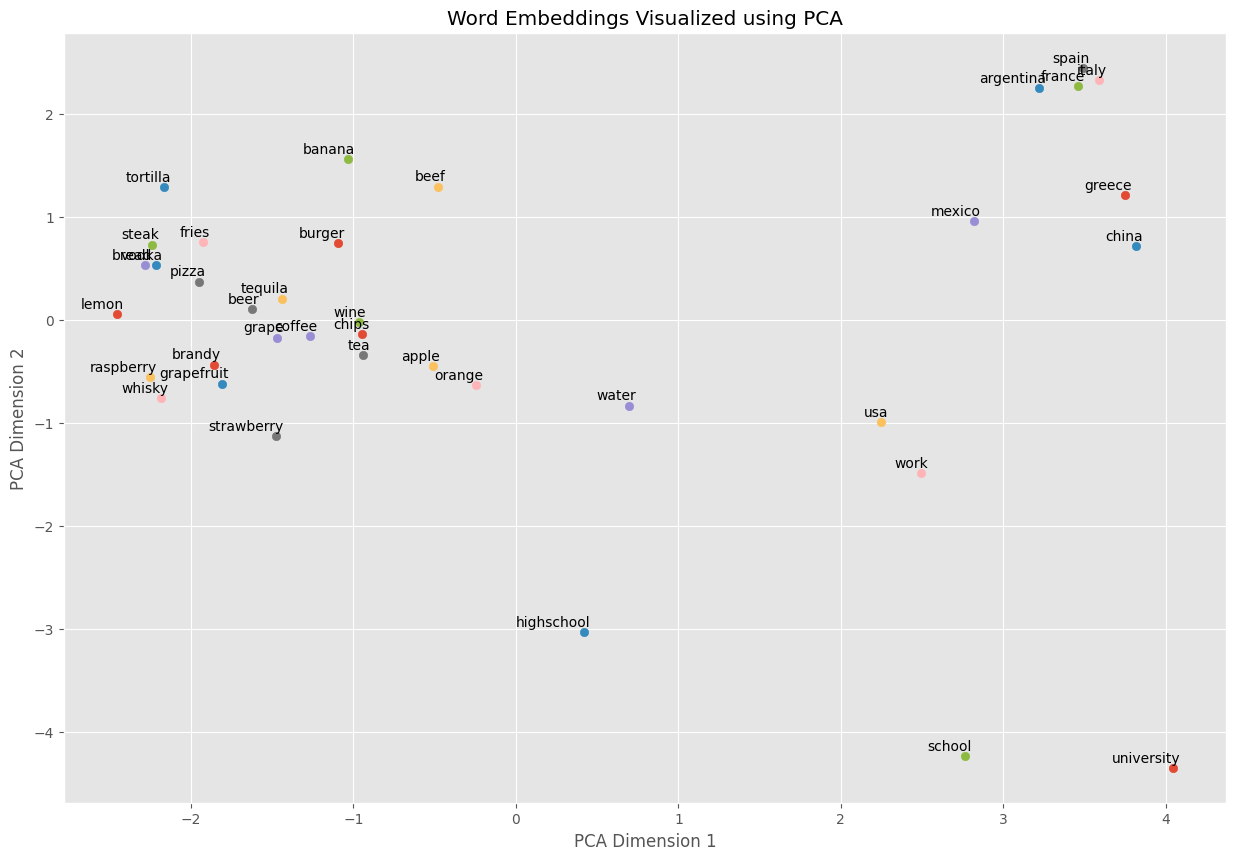

array([[-1.0925041 ,  0.74372876],
       [-2.1670628 ,  1.292367  ],
       [-2.2834158 ,  0.52902204],
       [-1.9500184 ,  0.3721772 ],
       [-0.47766322,  1.2940513 ],
       [-2.2378066 ,  0.7307441 ],
       [-1.92657   ,  0.75569266],
       [-0.9450014 , -0.13504937],
       [ 3.2193754 ,  2.246692  ],
       [ 2.8189163 ,  0.95552075],
       [ 3.488131  ,  2.4482503 ],
       [ 2.2472813 , -0.9943583 ],
       [ 3.4618902 ,  2.269228  ],
       [ 3.5916219 ,  2.3245144 ],
       [ 3.7501671 ,  1.2115402 ],
       [ 3.8158362 ,  0.7147594 ],
       [ 0.69911534, -0.83254534],
       [-1.6239517 ,  0.10265356],
       [-1.439923  ,  0.20648277],
       [-0.962911  , -0.02196907],
       [-2.1817415 , -0.7590347 ],
       [-1.8575069 , -0.43355262],
       [-2.2137516 ,  0.52904844],
       [-1.2642858 , -0.15639098],
       [-0.9421787 , -0.34516948],
       [-0.5101739 , -0.45191413],
       [-1.033432  ,  1.5628412 ],
       [-0.24471143, -0.6360452 ],
       [-2.4575224 ,

In [ ]:
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

### **2.4.** Visualización de TSNE

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


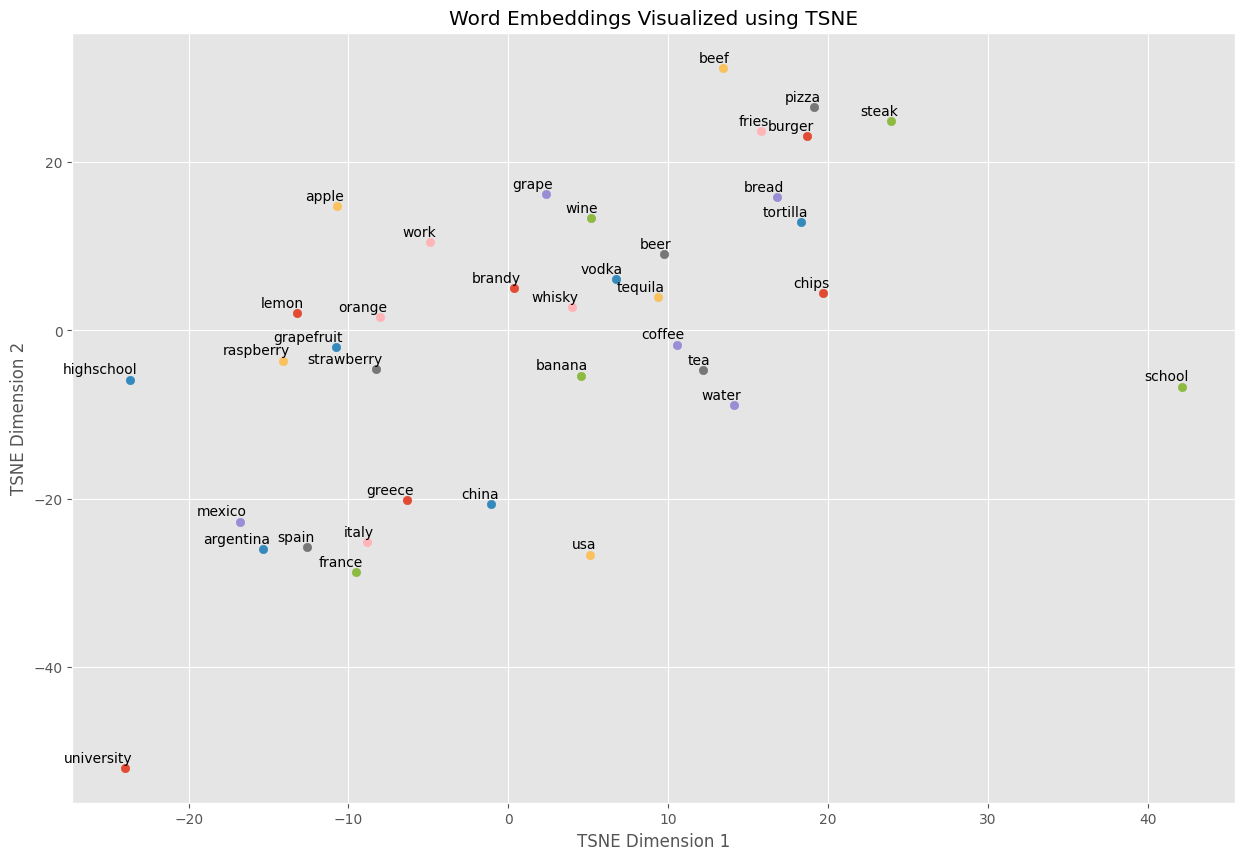

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

## **3.** Palabra más parecida

In [ ]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    # Obtener el vector de la palabra central
    if word not in embeddings_dict:
        return []

    word_vector = embeddings_dict[word]

    similarities = []

    # Iterar sobre todo el vocabulario
    for other_word, other_vector in embeddings_dict.items():
        # Evitar comparar la palabra consigo misma
        if other_word == word:
            continue

        # Calcular el producto punto
        dot_product = np.dot(word_vector, other_vector)

        # Calcular la norma (magnitud) de cada vector
        # Usamos norm de numpy.linalg
        norm_product = norm(word_vector) * norm(other_vector)

        # Similitud de Coseno
        similarity = dot_product / norm_product

        similarities.append((other_word, similarity))

    # Ordenar por similitud de forma descendente y tomar las top_n
    similarities.sort(key=lambda item: item[1], reverse=True)

    return similarities[:top_n]

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


## **4.** Analogías

In [ ]:
def analogy(word1, word2, word3, embeddings_dict, top_n=1):
  ''' Recibe tres palabras para una analogía y busca la cuarta.
  Recibe el diccionario y el top de palabras similares encontradas
  que se desea regresar. '''

    # Manejo de error inicial
    if not all(word in embeddings_dict for word in [word1, word2, word3]):
        print("Una o más palabras no están en el diccionario.")
        return []

    # 1. Obtener los vectores
    V_A = embeddings_dict[word1]
    V_B = embeddings_dict[word2]
    V_C = embeddings_dict[word3]

    # 2. Calcular el vector resultado de la analogía:
    # V_D = V_B - V_A + V_C
    V_target = V_B - V_A + V_C

    similarities = []

    # 3. Buscar el vector más similar a V_target
    for word, vector in embeddings_dict.items():
        # Excluir las palabras ya usadas
        if word in [word1, word2, word3]:
            continue

        # Calcular la similitud de coseno entre V_target y V_word
        dot_product = np.dot(V_target, vector)
        norm_product = norm(V_target) * norm(vector)

        similarity = dot_product / norm_product

        similarities.append((word, similarity))

    # 4. Ordenar y devolver el resultado
    similarities.sort(key=lambda item: item[1], reverse=True)

    return similarities[:top_n]

In [ ]:
analogy('man', 'king', 'woman', embeddings_dict)

[('queen', np.float32(0.86095816))]

In [ ]:
# Llama a la función de analogía y guarda los 5 mejores resultados
analogy_result = analogy('man', 'king', 'woman', embeddings_dict, top_n=5)

print("\nAnalogía (man:king :: woman:?):")
for i, w in enumerate(analogy_result, 1):
    print(f'{i} ---> {w[0]} (Similitud: {w[1]:.4f})')


Analogía (man:king :: woman:?):
1 ---> queen (Similitud: 0.8610)
2 ---> daughter (Similitud: 0.7685)
3 ---> prince (Similitud: 0.7641)
4 ---> throne (Similitud: 0.7635)
5 ---> princess (Similitud: 0.7513)
